# Understanding Sentence 

## Using NLP tools to to identify Verb, Subject, Object, Prepositions etc for getting a better understanding of sentences

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-media-1.freecodecamp.org/images/1*f6e0uf5PX17pTceYU4rbCA.jpeg")

In [4]:
import pandas as pd
from textblob import TextBlob
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt') # if necessary...
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]
'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))
vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

[nltk_data] Downloading package punkt to /home/maltesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from textblob import TextBlob
from textblob.utils import tree2str, filter_insignificant
import nltk
import sys
import time
def compound(text):
    converted = [] #will contain the converted strings
    blob = TextBlob(text)
    for sentence in blob.sentences:
        for index, tag in enumerate(sentence.tags):
            if index > 0 and sentence.tags[index-1][1] == tag[1]:
                if len(converted) > 0:
                    converted.pop()
                tup = (sentence.tags[index-1][0] + ' ' + tag[0], tag[1])
                converted.append(tup)
            else:
                tup = (tag[0], tag[1])
                converted.append(tup)
    return converted
def get_first_index_of(tag, all_tags):
    index = 0
    for tag_temp in all_tags:
        if tag in tag_temp[1]:
            return index
        else:
            index += 1
    return
def get_last_index_of(tag, all_tags):
    index = len(all_tags)
    for tag_temp in reversed(all_tags):
        if tag in tag_temp[1]:
            return index
        else:
            index -= 1
    return
def get_verbs(tags):
    ''' Finds the verbs'''
    verbs = []
    for tag in tags:
        if 'VB' in tag[1] or 'RP' in tag[1] and 'PRP' not in tag[1]:
            verbs.append(tag)
    return verbs
def get_determiner(verbs, all_tags):
    ''' Finds the Determiner before the provided verb'''
    if len(verbs) > 0:
        verb = verbs[len(verbs) - 1]
        index = all_tags.index(verb)
        tags = all_tags[index+1:]
        nouns = []
        for tag in tags:
            if 'DT' in tag[1]:
                return tag
def noun_before_verbs(verbs, all_tags):
    ''' Finds the Noun before the provided verb'''
    if len(verbs) > 0:
        verb = verbs[0]
        index = converted_tags.index(verb)
        tags = all_tags[:index]

        nouns = []
        for tag in tags:
            if 'NN' in tag[1] or 'PRP' in tag[1] or 'EX' in tag[1] or 'CC' in tag[1]:
                nouns.append(tag)
        return nouns
def prep_after_verb(verb, all_tags):
    ''' Finds the Preposition after the provided verb'''
    if len(verbs) > 0:
        verb = verbs[0]
        index = converted_tags.index(verb)
        tags = all_tags[index+1:]

        preps = []
        for tag in tags:
            if 'IN' in tag[1]:
                preps.append(tag)
        return preps
def noun_after_verb(verbs, all_tags):
    ''' Finds the Noun after the provided verb'''
    if len(verbs) > 0:
        verb = verbs[len(verbs) - 1]
        index = all_tags.index(verb)
        tags = all_tags[index+1:]
        first_index = get_first_index_of('NN',tags)
        tags = tags[first_index:]
        # return tags
        nouns = []
        for tag in tags:
            if 'NN' in tag[1]: # or 'IN' in tag[1]:
                nouns.append(tag)
        return nouns
def adj_after_verb(verbs, all_tags):
    ''' Finds the adjective after the provided verb'''
    if len(verbs) > 0:
        verb = verbs[len(verbs) - 1]
        index = all_tags.index(verb)
        tags = all_tags[index+1:]
        # return tags
        adjs = []
        for tag in tags:
            if 'JJ' in tag[1] or 'RB' in tag[1]:
                adjs.append(tag)
        return adjs

In [6]:
df = pd.read_excel('Data (2) .xlsx')

In [7]:
df.drop(['sl.no'],axis=1,inplace=True)

In [8]:
df.head()

,Text,Location,Category
0,There is any cigratte shop open near BTM 2nd s...,BTM 2,NE
1,Any petrol bunk open near JP Nagar 5th phase?,JP NAGAR 5,E
2,Any electrician available,JP NAGAR 3,S
3,Where can i get the chicken in jp nagar,JP NAGAR,NE
4,"I need a wifi connection in sarakki market, JP...",JP NAGAR 1,NE


## First Insights

E = Essential<br/>
NE = Non Essential<br/>
S = Situation Based<br/>
Q = Query<br/>

In [9]:
df['Category'].value_counts()

NE    54
E     30
Q     10
S      8
Name: Category, dtype: int64

In [10]:
df['Location'].value_counts()

JAYANAGAR               12
JP NAGAR 5              11
JP NAGAR 3               7
BTM 2                    7
CHANNASANDRA             6
BTM 1                    5
HEBBAL                   5
JP NAGAR 1               4
JP NAGAR                 4
JP NAGAR 7               4
BOMMANAHALLI             4
VENKATESHWARA LAYOUT     3
SILK BOARD               3
MADIWALA                 3
SOMESHNAGAR              3
FAZER TOWN               3
ELECTRONIC CITY          3
BANNERGHATTA ROAD        3
JP NAGAR METRO           3
ASHOK NAGAR              3
WILSON GARDEN            3
MARUTHI NAGAR            2
VIRAT NAGAR              1
Name: Location, dtype: int64

## Selct category you want

E = Essential<br/>
NE = Non Essential<br/>
S = Situation Based<br/>
Q = Query<br/>

## Select a custom category and area to undrestand the demand that is being asked 

In [11]:
category = 'E'
location = 'JP NAGAR 5'

In [12]:
a = df[df['Category']==category]

In [13]:
b = a[a['Location']==location]

In [14]:
b.reset_index(inplace=True)

In [15]:
b.drop('index',axis=1,inplace=True)

/home/maltesh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
b

,Text,Location,Category
0,Any petrol bunk open near JP Nagar 5th phase?,JP NAGAR 5,E
1,Any vegetables shop open near Jp Nagar 5th phase,JP NAGAR 5,E
2,Any milk and vegetable shop in Kaveri nagar,JP NAGAR 5,E
3,Get free doorsteps food delivery. Please inbox...,JP NAGAR 5,E
4,Any shop for green tea openend anywhere?,JP NAGAR 5,E
5,What time the grocery shop are open?,JP NAGAR 5,E
6,Any idea to fill gas cylinder shops?,JP NAGAR 5,E


In [17]:
data = {}
sentences = []
for i in range(1,len(b)):
    sentences.append(df.Text[i])
    data[b.Text[i]] = cosine_sim(b.Text[1],b.Text[i])

/home/maltesh/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words

In [18]:
import operator
sorted_d = dict( sorted(data.items(), key=operator.itemgetter(1),reverse=True))

In [19]:
sorted_d

{'Any vegetables shop open near Jp Nagar 5th phase': 1.0000000000000002,
 'Any milk and vegetable shop in Kaveri nagar': 0.3808165329771113,
 'What time the grocery shop are open?': 0.20608363501393823,
 'Any idea to fill gas cylinder shops?': 0.17856621555757476,
 'Any shop for green tea openend anywhere?': 0.1597642092414444,
 'Get free doorsteps food delivery. Please inbox your number': 0.0}

## Using the sentences to create a WordCloud for visual representation

In [20]:
sentences1 = ' '.join(sentences)

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [22]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(sentences1)

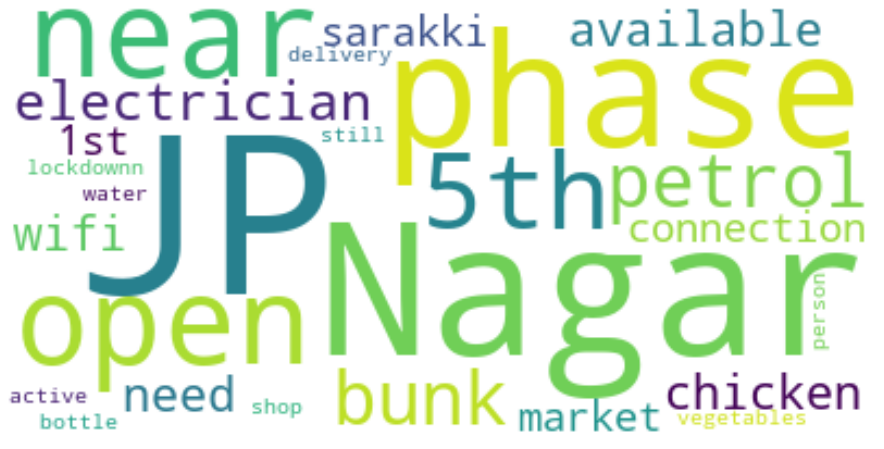

In [23]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Splitting each sentence to get a better understanding 

In [24]:
for aText in sentences:
    converted_tags = compound(aText)
    verbs = get_verbs(converted_tags)
    subjects = noun_before_verbs(verbs, converted_tags)
    objects = noun_after_verb(verbs, converted_tags)
    preposition = prep_after_verb(verbs, converted_tags)
    determiner = get_determiner(verbs, converted_tags)
    adj = adj_after_verb(verbs, converted_tags)
    
    print(aText)
    print('-----------------------------------------')
    print(converted_tags)
    print('Verbs: \t\t\t', verbs)
    print('Subjects:\t\t', subjects)
    print('Objects:\t\t', objects)
    print('What/Which/Who/How:\t', adj)
    print('Preposition:\t\t', preposition)
    print('===================xxxx==================')
    print('Determiner: ', determiner)
    
    print()
    print()

Any petrol bunk open near JP Nagar 5th phase?
-----------------------------------------
[('Any', 'DT'), ('petrol bunk', 'NN'), ('open', 'JJ'), ('near', 'IN'), ('JP Nagar', 'NNP'), ('5th', 'CD'), ('phase', 'NN')]
Verbs: 			 []
Subjects:		 None
Objects:		 None
What/Which/Who/How:	 None
Preposition:		 None
===================xxxx==================
Determiner:  None


Any electrician available
-----------------------------------------
[('Any', 'DT'), ('electrician available', 'JJ')]
Verbs: 			 []
Subjects:		 None
Objects:		 None
What/Which/Who/How:	 None
Preposition:		 None
===================xxxx==================
Determiner:  None


Where can i get the chicken in jp nagar
-----------------------------------------
[('Where', 'WRB'), ('can', 'MD'), ('i get', 'VB'), ('the', 'DT'), ('chicken', 'NN'), ('in', 'IN'), ('jp nagar', 'NN')]
Verbs: 			 [('i get', 'VB')]
Subjects:		 []
Objects:		 [('chicken', 'NN'), ('jp nagar', 'NN')]
What/Which/Who/How:	 []
Preposition:		 [('in', 'IN')]
===========

In [25]:
x = dict(converted_tags)

In [26]:
x = {v: k for k, v in x.items()}

In [27]:
for aText in sentences:
    converted_tags = compound(aText)
    verbs = get_verbs(converted_tags)
    subjects = noun_before_verbs(verbs, converted_tags)
    objects = noun_after_verb(verbs, converted_tags)
    preposition = prep_after_verb(verbs, converted_tags)
    determiner = get_determiner(verbs, converted_tags)
    adj = adj_after_verb(verbs, converted_tags)
    
    print(aText)
    print('-----------------------------------------')
    print(converted_tags)
    x = dict(converted_tags)
    x = {v: k for k, v in x.items()}
    #print(x)
        
    print()
    print()

Any petrol bunk open near JP Nagar 5th phase?
-----------------------------------------
[('Any', 'DT'), ('petrol bunk', 'NN'), ('open', 'JJ'), ('near', 'IN'), ('JP Nagar', 'NNP'), ('5th', 'CD'), ('phase', 'NN')]


Any electrician available
-----------------------------------------
[('Any', 'DT'), ('electrician available', 'JJ')]


Where can i get the chicken in jp nagar
-----------------------------------------
[('Where', 'WRB'), ('can', 'MD'), ('i get', 'VB'), ('the', 'DT'), ('chicken', 'NN'), ('in', 'IN'), ('jp nagar', 'NN')]


I need a wifi connection in sarakki market, JP nagar 1st phase
-----------------------------------------
[('I', 'PRP'), ('need', 'VBP'), ('a', 'DT'), ('wifi', 'JJ'), ('connection', 'NN'), ('in', 'IN'), ('sarakki market', 'NN'), ('JP', 'NNP'), ('nagar', 'RB'), ('1st', 'CD'), ('phase', 'NN')]


Any vegetables shop open near Jp Nagar 5th phase
-----------------------------------------
[('Any', 'DT'), ('vegetables', 'NNS'), ('shop', 'VBP'), ('open', 'JJ'), ('near'